### This file plots the processed csv files with matplotlib

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [123]:
date = '2018-12-06_23h08'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'

## Throughput plot for read loads

In [124]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'one_mw_tp.csv')
df_tp = df_tp[df_tp['client'] <= 192]
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,3502.583333,100.257960,2929.800000,10.262878
1,6,16,3573.616667,18.476492,2897.911111,50.002208
2,6,32,3522.233333,83.395848,2938.672222,0.975661
3,6,64,3535.005556,40.412256,2931.255556,3.591820
4,24,8,6641.277778,94.239347,2941.594444,0.846161
5,24,16,6949.733333,136.839135,2944.883333,3.312966
6,24,32,6660.927778,150.033679,2944.311111,4.982606
7,24,64,6484.211111,124.247327,2945.027778,1.501378
8,48,8,7112.416667,233.101930,2938.077778,2.831187
9,48,16,8104.805556,230.010976,2943.388889,0.929987


In [125]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

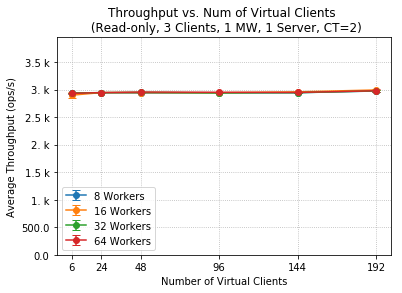

In [126]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=1e3+np.mean(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_read.png", dpi = 150)


## Throughput plot for write loads

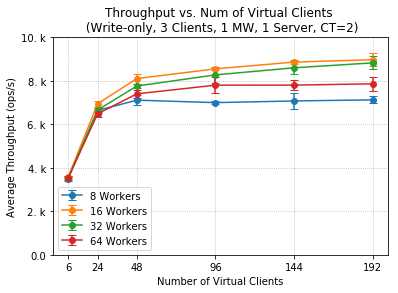

In [139]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=3e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [141]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'one_mw_rt.csv')
df_rt = df_rt[df_rt['client'] <= 192]
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,1.001946,0.030241,1.257837,0.026681
1,6,16,0.990264,0.008638,1.246693,0.032468
2,6,32,1.009476,0.021421,1.246842,0.013893
3,6,64,1.003054,0.017197,1.276242,0.009525
4,24,8,2.601321,0.083982,7.023709,0.283905
5,24,16,1.891147,0.009826,7.023345,0.211148
6,24,32,1.874733,0.004574,6.896435,0.110409
7,24,64,1.879854,0.015048,7.015060,0.171712
8,48,8,5.743655,0.077662,15.404979,0.028360
9,48,16,3.629139,0.106890,14.909991,0.266044


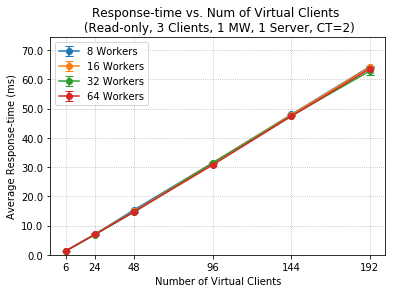

In [142]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_read.png", dpi = 150)


## Response-time plot for write loads

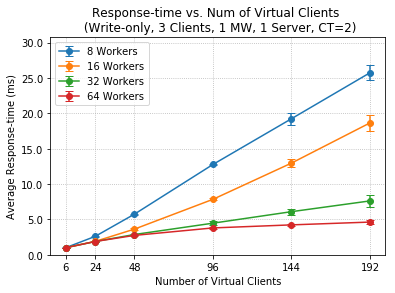

In [143]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_write.png", dpi = 150)


## Queue length plot for read loads

In [131]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'one_mw_queuelength.csv')
df_ql = df_ql[df_ql['client'] <= 192]
df_ql

,client,worker,read_queueLength,read_queueLength_std,write_queueLength,write_queueLength_std
0,6,8,1.618248,0.007013,1.279490,0.048796
1,6,16,1.546995,0.055762,1.265253,0.035910
2,6,32,1.567695,0.032476,1.245974,0.017275
3,6,64,1.486904,0.007537,1.204836,0.007593
4,24,8,10.007043,0.766338,9.273338,0.385061
5,24,16,3.872697,0.133181,3.023461,0.114959
6,24,32,5.219113,0.210601,2.917807,0.109858
7,24,64,5.253481,0.254008,2.735744,0.124825
8,48,8,34.309239,0.108851,32.513811,0.810959
9,48,16,20.832881,0.720024,14.493024,1.044020


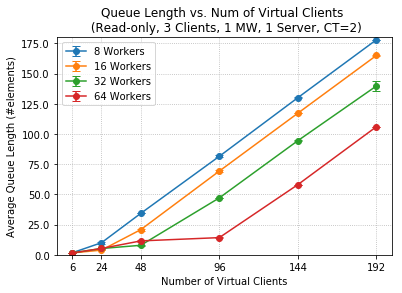

In [144]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['read_queueLength']
    std = df_ql_cut[' read_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['read_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_read.png", dpi = 150)


## Queue length plot for write loads

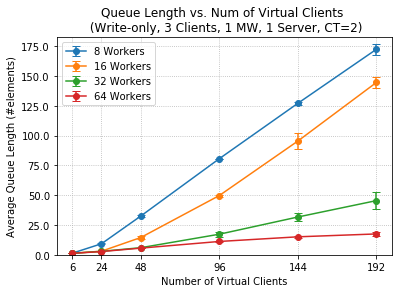

In [146]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for read loads

In [134]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'one_mw_rt_breakdown.csv')
df_b = df_b[df_b['client'] <= 192]
df_b

,client,worker,read_netthreadTime,read_queueTime,read_workerPreTime,read_memcachedRTT,read_workerPostTime,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,6,8,0.016226,0.100191,0.013111,1.111197,0.017112,0.034728,0.080345,0.014510,0.835324,0.037039
1,6,16,0.017540,0.100253,0.014209,1.096930,0.017762,0.033158,0.079261,0.013753,0.828871,0.035222
2,6,32,0.017047,0.097272,0.014134,1.100404,0.017986,0.033097,0.077099,0.013083,0.851799,0.034399
3,6,64,0.018643,0.098704,0.015429,1.125252,0.018214,0.033285,0.071988,0.013603,0.848396,0.035782
4,24,8,0.019459,4.321088,0.021814,2.640195,0.021153,0.044085,1.412465,0.028778,1.039245,0.076747
5,24,16,0.022528,2.045129,0.027138,4.907615,0.020934,0.057309,0.366011,0.037502,1.311123,0.119202
6,24,32,0.023819,0.380283,0.026506,6.444821,0.021006,0.063050,0.253631,0.042732,1.375205,0.140115
7,24,64,0.021449,0.347662,0.022232,6.603283,0.020435,0.065817,0.241208,0.042358,1.386498,0.143973
8,48,8,0.021185,12.685085,0.028096,2.649753,0.020861,0.041375,4.599681,0.027843,1.003939,0.070817
9,48,16,0.022533,9.486628,0.046336,5.332658,0.021835,0.057595,1.865211,0.057452,1.490286,0.158594


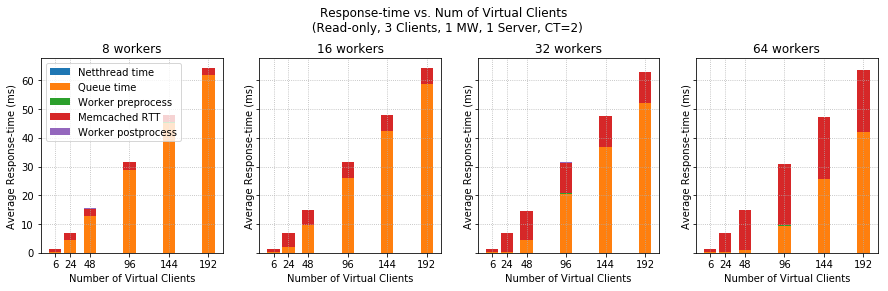

In [135]:
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2)")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)
i=0

for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['read_netthreadTime']
    queue_time = df_b_cut['read_queueTime']
    workerPreTime = df_b_cut['read_workerPreTime']
    memcachedRTT = df_b_cut['read_memcachedRTT']
    workerPostTime = df_b_cut['read_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_read.png", dpi = 150)


## Response-time breakdown histogram for write loads

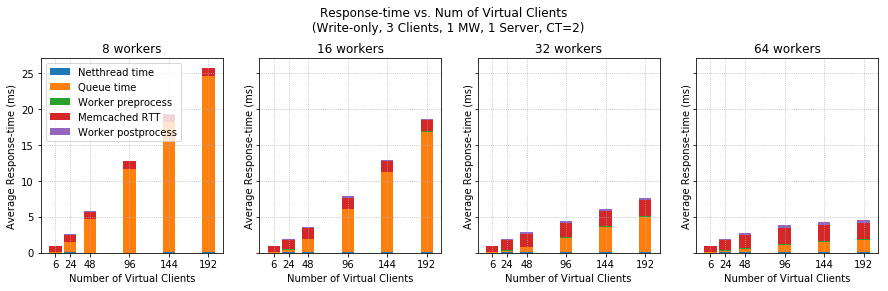

In [147]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_write.png", dpi = 150)


## Time in front of net-thread plot for write loads

In [153]:
# read data into pandas dataframe
df_rt_mw = pd.read_csv(base_path + 'one_mw_rt.csv')
df_rt_mw = df_rt_mw[df_rt_mw['client'] <= 192]
df_rt_mem = pd.read_csv(base_path + 'one_mw_mem_rt.csv')
df_rt_mem = df_rt_mem[df_rt_mem['client'] <= 192]
print(df_rt_mw)
df_rt = df_rt_mw
df_rt['write_rt_mean'] = df_rt_mem['write_rt_mean']-df_rt_mw['write_rt_mean']
print(df_rt)

    client  worker  write_rt_mean  write_rt_std  read_rt_mean  read_rt_std
0        6       8       1.001946      0.030241      1.257837     0.026681
1        6      16       0.990264      0.008638      1.246693     0.032468
2        6      32       1.009476      0.021421      1.246842     0.013893
3        6      64       1.003054      0.017197      1.276242     0.009525
4       24       8       2.601321      0.083982      7.023709     0.283905
5       24      16       1.891147      0.009826      7.023345     0.211148
6       24      32       1.874733      0.004574      6.896435     0.110409
7       24      64       1.879854      0.015048      7.015060     0.171712
8       48       8       5.743655      0.077662     15.404979     0.028360
9       48      16       3.629139      0.106890     14.909991     0.266044
10      48      32       2.869306      0.044276     14.651925     0.201658
11      48      64       2.743468      0.055538     14.756145     0.028174
12      96       8      1

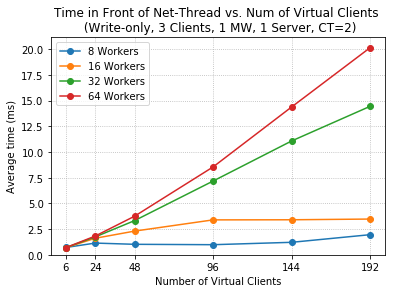

In [154]:
f = plt.figure()
plt.title("Time in Front of Net-Thread vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    #std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = None, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+1)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_write_front_netthread.png", dpi = 150)
